In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from matplotlib import transforms, pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 0.5
GRAY4, GRAY7 = '#646369', '#929497'

In [2]:
df = pd.read_csv("~/Desktop/controlLowHigh.csv")
ar = df.values
arT = ar.T
toBeDelete = []
for i in range(2,arT.shape[0]):
    tmp = arT[i]
    count = 0
    for j in range(arT.shape[1]):
        if tmp[j] < 1e-6:
            count = count + 1
    if count > (arT.shape[1]-2):
        print(i, count)
        toBeDelete.append(i)
df.drop(df.columns[toBeDelete], axis=1, inplace=True)

2 66
24 65
25 65
45 65
65 65
68 66
69 66
75 66


In [3]:
df['Risk'] = pd.factorize(df['Risk'])[0]
features = df.columns.values.tolist()
features.remove('Risk')
features.remove('Sample Name')
target = 'Risk'
df[features + [target]]

,GSSG,8-OH-dG,GSH,L-Leucine,L-Kynurenine,L-Tryptophan,5-HTP,Cholic acid,N-phenylacetylglycine,5-HT,...,glutamine,betaine,histidine,methionine,serine-1,pyroglutamic acid,benzene acetyl glycine,N6-acetyl lysine,nicotinamide,Risk
0,0.0,1.4100,0.00933,321.0,1.480,14.20,0.04980,0.00000,0.1800,0.983,...,0.00000,91.4,0.02660,0.0,0.0,0.00,0.000,40.7,0.00000,0
1,0.0,1.5900,0.00714,397.0,1.210,13.20,0.02430,0.00636,0.1750,0.723,...,0.04290,109.0,0.07510,0.0,0.0,0.00,0.000,13.4,0.00000,0
2,0.0,2.0800,0.00810,617.0,1.890,14.60,0.03160,0.01100,0.6010,0.629,...,0.03240,65.0,0.18600,0.0,0.0,0.00,0.000,19.3,0.04880,0
3,0.0,1.3700,0.01260,426.0,1.410,12.10,0.05200,0.00888,0.3120,1.250,...,0.02840,75.6,0.13200,0.0,0.0,0.00,0.000,16.8,0.00669,0
4,0.0,0.8250,0.00658,588.0,2.490,23.20,0.05410,0.04940,0.1650,1.470,...,0.00000,134.0,0.09860,0.0,0.0,0.00,0.000,20.0,0.01730,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,0.1160,0.01020,343.0,0.540,7.05,0.01830,0.00000,0.0000,0.370,...,0.01220,67.3,0.02540,0.0,0.0,4.75,0.931,13.3,0.01830,2
62,0.0,0.0542,0.01540,277.0,0.680,6.27,0.01540,0.00000,0.0000,0.628,...,0.00855,54.3,0.01350,0.0,0.0,5.70,0.000,14.3,0.00000,2
63,0.0,0.6370,0.00186,285.0,0.748,4.89,0.00975,0.00558,0.0428,0.499,...,0.00000,40.0,0.01160,0.0,0.0,3.62,0.000,11.8,0.00000,2
64,0.0,0.4200,0.01530,309.0,0.429,5.56,0.01720,0.00000,0.1020,0.314,...,0.01910,32.7,0.01780,0.0,0.0,2.38,0.000,12.5,0.00000,2


In [4]:
X, y = df[features].values, df[target].values

In [5]:
df[features].describe()

,GSSG,8-OH-dG,GSH,L-Leucine,L-Kynurenine,L-Tryptophan,5-HTP,Cholic acid,N-phenylacetylglycine,5-HT,...,PE(36:4),glutamine,betaine,histidine,methionine,serine-1,pyroglutamic acid,benzene acetyl glycine,N6-acetyl lysine,nicotinamide
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.000833,0.551585,0.010573,346.757576,0.919606,10.458485,0.032838,0.004735,0.186958,0.578455,...,3.019697,0.015443,61.840909,0.049083,0.000058,0.000077,0.857879,0.040773,14.830455,0.009109
std,0.002112,0.528061,0.006368,91.195658,0.480949,4.403692,0.021008,0.009084,0.189007,0.227764,...,0.808436,0.015201,25.484058,0.037670,0.000384,0.000497,1.802350,0.243520,5.060504,0.014353
min,0.000000,0.017700,0.000000,207.000000,0.341000,3.000000,0.001840,0.000000,0.000000,0.257000,...,1.760000,0.000000,27.800000,0.000000,0.000000,0.000000,0.000000,0.000000,8.520000,0.000000
25%,0.000000,0.235000,0.005945,278.750000,0.552750,6.437500,0.016325,0.000000,0.054125,0.451750,...,2.480000,0.004707,45.100000,0.015900,0.000000,0.000000,0.000000,0.000000,11.550000,0.000000
50%,0.000000,0.389000,0.009560,336.000000,0.761000,11.500000,0.024800,0.000000,0.157000,0.532000,...,2.850000,0.011750,59.250000,0.043150,0.000000,0.000000,0.000000,0.000000,13.450000,0.000000
75%,0.000000,0.700000,0.014225,395.000000,1.127500,13.350000,0.049250,0.008250,0.248000,0.628750,...,3.440000,0.024900,70.300000,0.075050,0.000000,0.000000,0.000000,0.000000,16.400000,0.016550
max,0.009890,2.620000,0.028300,617.000000,2.520000,23.200000,0.085800,0.049400,0.969000,1.470000,...,6.360000,0.086300,183.000000,0.186000,0.003030,0.003870,7.550000,1.760000,40.700000,0.078200


In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10000, 
                               random_state=507, 
                               max_features = 'sqrt',
                               )

model.fit(X, y.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=507,
                       verbose=0, warm_start=False)

In [7]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {(np.mean(n_nodes))}')
print(f'Average maximum depth {(np.mean(max_depths))}')

Average number of nodes 14.616
Average maximum depth 4.3595


In [8]:
fi = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)


In [9]:
fi.head(60)

,feature,importance
17,Hippuric acid,0.090453
60,histidine,0.072931
1,8-OH-dG,0.057186
38,C18:1LPC,0.053388
57,PE(36:4),0.048271
50,LPC(20:1),0.045630
24,Cl-Tyr,0.044470
19,Ascorbic acid,0.042455
4,L-Kynurenine,0.042094
28,Acetylcarnitine,0.035059


In [33]:
fi.head(60)

,feature,importance
17,Hippuric acid,0.090453
60,histidine,0.072931
1,8-OH-dG,0.057186
38,C18:1LPC,0.053388
57,PE(36:4),0.048271
50,LPC(20:1),0.045630
24,Cl-Tyr,0.044470
19,Ascorbic acid,0.042455
4,L-Kynurenine,0.042094
28,Acetylcarnitine,0.035059


In [34]:
sum(fi.values.T[1])

0.9999999999999999

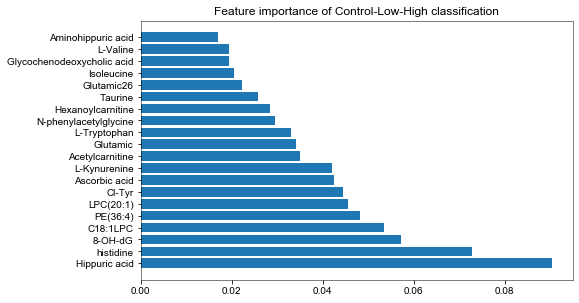

In [10]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    plt.figure(figsize=(8, 4.5))
    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.title('Feature importance of Control-Low-High classification')
    plt.subplots_adjust(left=0.2, bottom=0.1, right=0.95, top=0.9, wspace=0, hspace=0)
    plt.yticks(range(top), names[::-1][0:top], fontsize=10)
    plt.savefig("ControlLowHighImportance.pdf")
    plt.show()
f_importances(fi.values.T[1], fi.values.T[0], 20)

In [11]:
from sklearn.tree import export_graphviz

In [12]:
export_graphviz(model.estimators_[1000], 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=features, max_depth = 10, 
                class_names = ['0', '1', '2'], filled = True)

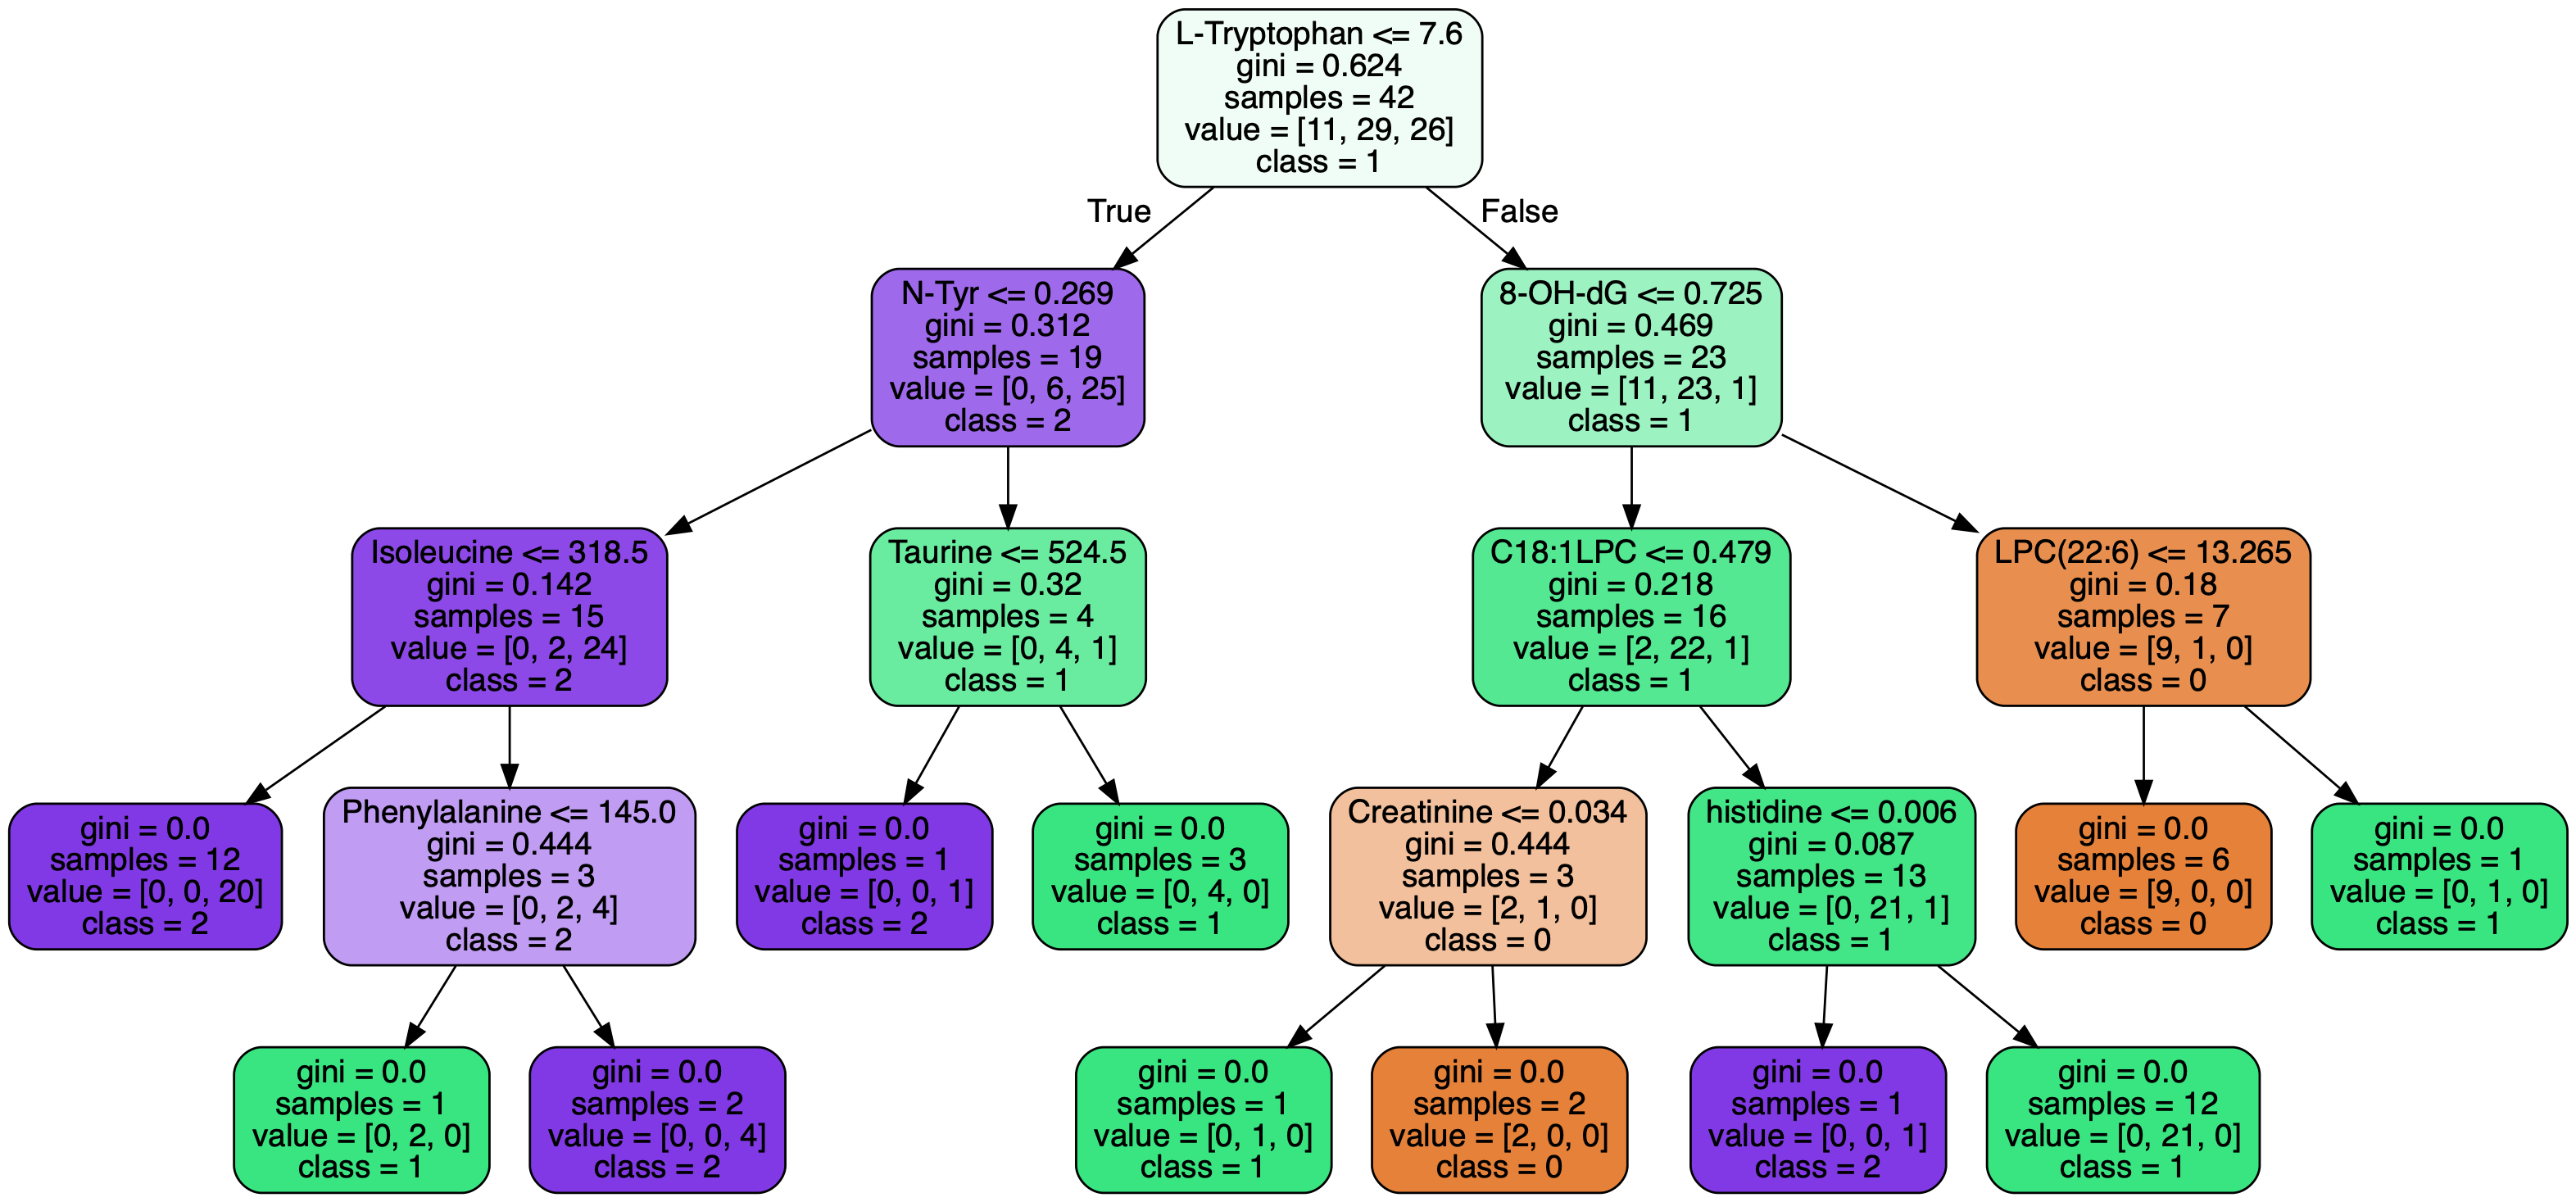

In [13]:
from subprocess import call
from IPython.display import Image

call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

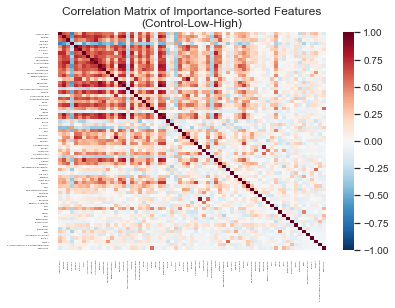

In [14]:


corr_numeric = df[fi.values.T[0]].corr()
sns.set(font_scale=0.2)
ax = sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r", vmin=-1, vmax=1)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.title("Correlation Matrix of Importance-sorted Features\n(Control-Low-High)", fontsize=12)

plt.savefig("CorrMatCLH.pdf")
plt.show() 